In [ ]:
import numpy as np 
from random import random,uniform
import matplotlib.pyplot as plt 
%matplotlib qt

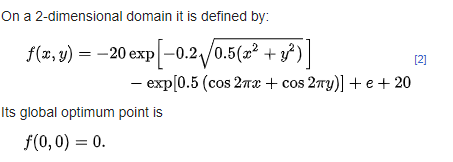

In [ ]:
class Ackley:
    def __init__(self) :
        self.x_range = np.array([-5,5],dtype=np.float32)
        self.y_range = np.array([-5,5],dtype=np.float32)
        self.minima = 0.0
        self.location = np.array([0,0],dtype=np.float32).reshape(1,2)

    def Query(self,x,y):
        z = (-20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))) - (np.exp(0.5 * (np.cos(2 * np.pi * x) \
            + np.cos(2 * np.pi * y)))) + np.exp(1)+20
        return z

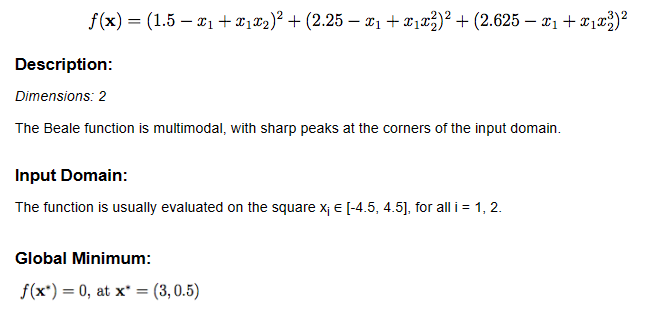

In [ ]:
class Baele:
    def __init__(self) :
        self.x_range = np.array([-4.5,4.5],dtype=np.float32)
        self.y_range = np.array([-4.5,4.5],dtype=np.float32)
        self.minima = 0.0
        self.location = np.array([3,0.5],dtype=np.float32).reshape(1,2)

    def Query(self,x,y):
        h = (1.5 - x + x*y )**2 + (2.25 - x + x * (y**2))**2 + (2.65 - x + x * (y**3))**2
        return h

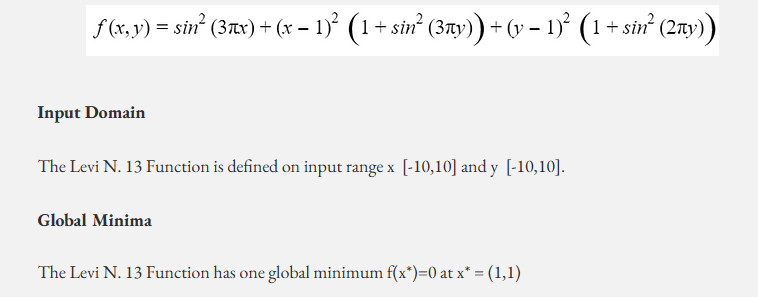

In [ ]:
class Levi :
    def __init__(self) :
        self.x_range = np.array([-10,10],dtype=np.float32)
        self.y_range = np.array([-10,10],dtype=np.float32)
        self.minima = 0.0
        self.location = np.array([1,1],dtype=np.float32).reshape(1,2)

    def Query(self,x,y):
        
        a= np.sin(3*np.pi*x)**2 + (x-1)**2*(1+np.sin(3*np.pi*y)*np.sin(3*np.pi*y))+ (y-1)*(y-1)*(1+np.sin(2*np.pi*y)*np.sin(2*np.pi*y))

        return a 

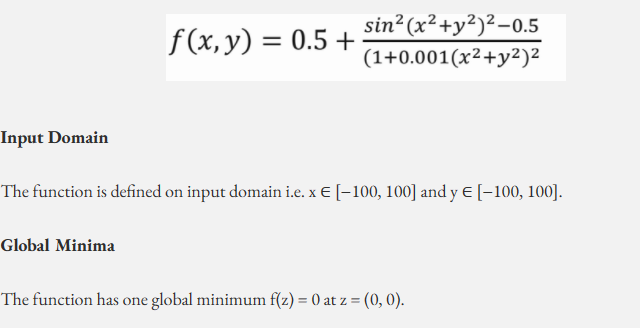

In [ ]:
class Schaffer_N2 :
    def __init__(self) :
        self.x_range = np.array([-100,100],dtype=np.float32)
        self.y_range = np.array([-100,100],dtype=np.float32)
        self.minima = 0.0
        self.location = np.array([0,0],dtype=np.float32).reshape(1,2)

    def Query(self,x,y):
        
        num = (np.sin((x**2 + y**2)**2)**2) - 0.5
        den = (1 + 0.001*(x**2 + y**2))**2 
        return 0.5 + num/den

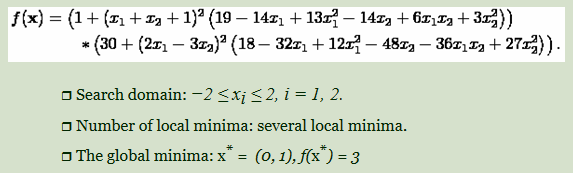

In [ ]:
class Goldstein_Price :
    def __init__(self) :
        self.x_range = np.array([-2,2],dtype=np.float32)
        self.y_range = np.array([-2,2],dtype=np.float32)
        self.minima = 3
        self.location = np.array([0,-1],dtype=np.float32).reshape(1,2)

    def Query(self,x,y):
        
        g = (1+(x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))
        return g

In [ ]:
class Bat_ALgorithm :
    def __init__(self,optimizer,Population_Size =100,Num_Movements = 100):
        # Functions informations
        self.x_range = optimizer.x_range 
        self.y_range = optimizer.y_range

        # Bat Population and Dynamics
        self.Population_Size = Population_Size
        self.Population , self.Cost = self.Initialize_Population(optimizer)

        self.Loudness = np.ones(shape=(self.Population_Size,1),dtype=np.float32)
        self.Pulse_Rate = np.zeros(shape=(self.Population_Size,1),dtype=np.float32)
        self.Frequency = np.zeros(shape=(self.Population_Size,2),dtype=np.float32)
        self.Velocity = np.ones(shape=(self.Population_Size,2),dtype=np.float32)

        # Create Internal algorithm paramaters
        self.Movements = Num_Movements
        self.Frequency_Range = np.array([0.0,1.4],dtype=np.float32)
        
        #arbetrary values can manipulate them to our needs 
        self.Loudness_Decay = 1.55
        self.Loudness_Limit = 0.1995
        self.Pulse_Rate_Decay = 1.5
        self.Gamma = 1.5

        # Optimization Results 
        self.Best_Position = np.zeros(shape=(1,2),dtype=np.float32)
        self.Best_Cost = 0.0
        self.Best_Bat = 0


    def Initialize_Population(self,optimizer):
        Population = np.zeros(shape=(self.Population_Size,2),dtype=np.float32)
        Cost = np.zeros(shape=(self.Population_Size,1),dtype=np.float32)

        for i in range (self.Population_Size):
            Population[i,0] = (self.x_range[1] - self.x_range[0]) * np.float32(random()) + self.x_range[0]
            Population[i,1] = (self.y_range[1] - self.y_range[0]) * np.float32(random()) + self.y_range[0]
            Cost[i,0] = optimizer.Query(Population[i,0],Population[i,1])
        
        return Population , Cost


    def Update_Dynamics (self,bat,best):
        self.Frequency[bat,:] = self.Frequency_Range[0] + (self.Frequency_Range[1] - self.Frequency_Range[0] * np.random.rand(1,self.Population.shape[1]))
        self.Velocity[bat,:] = (self.Population[best,:] - self.Population[bat,:]) * self.Frequency[bat,:]
        position = self.Population[bat,:] + self.Velocity[bat,:]

        return position   

    def Run (self,optimizer):
        best_fit = self.Cost.min()
        best_index = self.Cost.argmin()

        Bats_plot = plt.scatter(self.Population[:, 0], self.Population[:, 1], c='b',marker='*', alpha=0.5, label = 'Bats')
        Best_plot = plt.scatter(self.Best_Position[:, 0], self.Best_Position[:, 1], c='r', marker='*', s=200, label = 'Best Position')
        plt.title(f'BAT OPTIMIZATION \nUsing {optimizer.__class__.__name__} Function ',fontsize=17)
        plt.xticks([])
        plt.yticks([])
        plt.legend()
        plt.show()
        
        #Iterate through the simulation 
        for step in range (1,self.Movements+1):
            
            for bat in range (self.Population_Size):

                # update the position of the bat 
                position = self.Update_Dynamics(bat,best_index)

                # apply random walk 
                if random() < self.Loudness[bat,:] :
                    position+= self.Loudness.mean() * np.float32(uniform(-1,1))

                #check the limits of the search space 
                if position[0] < optimizer.x_range[0]:
                    position[0] = optimizer.x_range[0]
                elif position[0] > optimizer.x_range[1]:
                    position[0] = optimizer.x_range[1] 

                if position[1] < optimizer.y_range[0]:
                    position[1] = optimizer.y_range[0]
                elif position[1] > optimizer.y_range[1]:
                    position[1] = optimizer.y_range[1]               

                #check the Cost of the bat 
                Bat_Cost = optimizer.Query(position[0],position[1])

                if Bat_Cost < self.Cost[bat,:]:
                    self.Cost[bat,:] = Bat_Cost
                    self.Population[bat,:] = position
                    self.Pulse_Rate[bat,:] = self.Pulse_Rate_Decay * (1-np.exp(-self.Gamma * step))

                    if self.Loudness[bat,0] > self.Loudness_Limit :
                        self.Loudness[bat,0] *= self.Loudness_Decay
                    else :
                        self.Loudness[bat,0] *= self.Loudness_Limit

                    if Bat_Cost < best_fit :
                        best_fit = Bat_Cost
                        best_index = bat

                        #update best values 
                        self.Best_Position = position.reshape(1,2)
                        self.Best_Cost = Bat_Cost
                        self.Best_Bat = bat 

                plt.setp(Bats_plot, offsets = np.column_stack((self.Population[:, 0], self.Population[:, 1])))
                plt.setp(Best_plot, offsets = np.column_stack((self.Best_Position[:, 0], self.Best_Position[:, 1])))
                plt.pause(0.01)

In [ ]:
ackley = Ackley()
baele = Baele()
levi = Levi()
schaffer = Schaffer_N2()
goldstein = Goldstein_Price()

In [ ]:
bat_algorithm = Bat_ALgorithm(baele, Population_Size=70, Num_Movements=100)
%time _ = bat_algorithm.Run(baele)
# Display the result from simulation 
print('='*50)
print('Optimizer')
print('='*50)
print(f'Best Cost {bat_algorithm.Best_Cost}')
print(f'Best Position : X: {bat_algorithm.Best_Position[0,0]}, Y: {bat_algorithm.Best_Position[0,1]} ')
print('='*50)
print('Function')
print('='*50)
print(f'Global Minimum {baele.minima}')
print(f'Location X: {baele.location[0,0]}, Y: {baele.location[0,1]}')
print('='*50)